In [2]:
import pandas as pd
import numpy as np

# Source

https://archive.ics.uci.edu/ml/datasets/heart+disease

In [3]:
# Read Data

header = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak',
         'slope','ca','thal','num']

data =  pd.read_csv('../dataset/processed.cleveland.data', 
                    sep=",",
                    names=header)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

# Understanding Data

In [7]:
import seaborn as sns

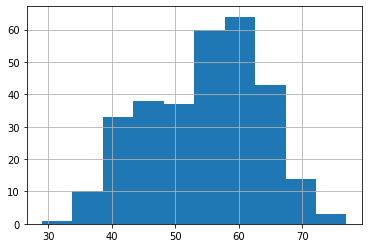

In [8]:
# Age

data['age'].hist()

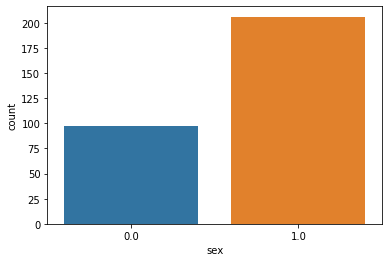

In [9]:
# Sex

sns.countplot(data=data, x='sex')

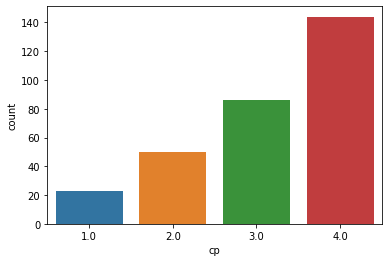

In [10]:
# cp

sns.countplot(data=data, x='cp')

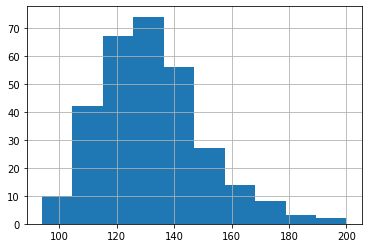

In [11]:
# trestbps

data['trestbps'].hist()

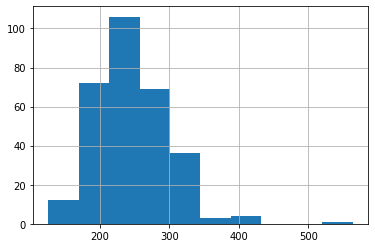

In [12]:
# chol

data['chol'].hist()

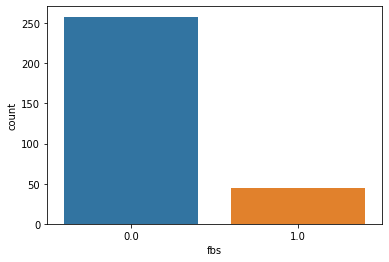

In [13]:
# fbs

sns.countplot(data=data, x='fbs')

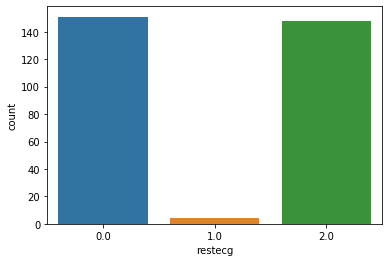

In [14]:
# restecg

sns.countplot(data=data, x='restecg')

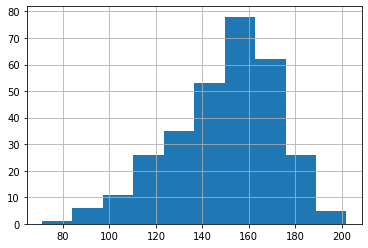

In [15]:
# thalach

data['thalach'].hist()

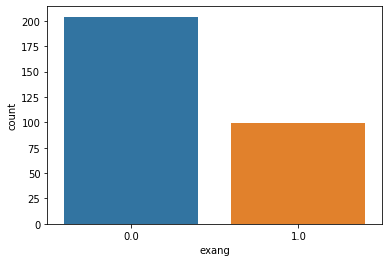

In [16]:
# exang

sns.countplot(data=data, x='exang')

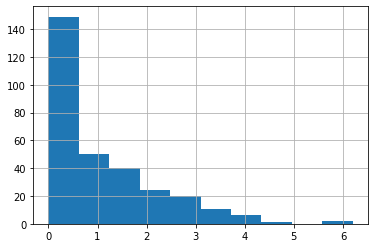

In [17]:
# oldpeak

data['oldpeak'].hist()

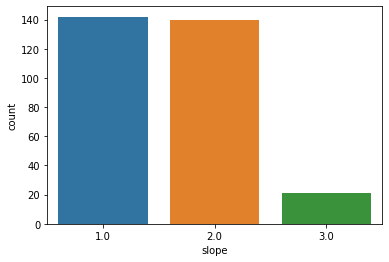

In [18]:
# slope

sns.countplot(data=data, x='slope')

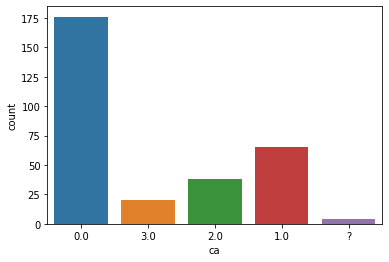

In [19]:
# cha

sns.countplot(data=data, x='ca')

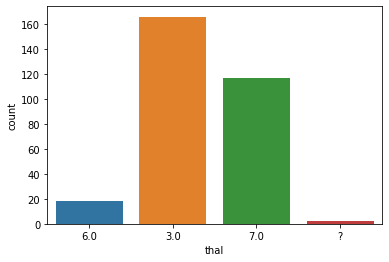

In [20]:
# thal

sns.countplot(data=data, x='thal')

# Data Preparation

Drop ca and thal with ? values

In [21]:
data.drop(data[data['ca'] == '?'].index, inplace = True)
data.drop(data[data['thal'] == '?'].index, inplace = True)

In [22]:
data.shape

(297, 14)

In [23]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [24]:
data['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [25]:
data['ca'] = pd.to_numeric(data['ca'])

In [26]:
data['thal'] = pd.to_numeric(data['thal'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [28]:
data['num_categorical'] = data['num'].apply(lambda x:0 if x == 0 else 1)

In [29]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num_categorical
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


# Correlation to Target

In [30]:
import matplotlib.pyplot as plt

In [31]:
# Split categorical and numerical variable

cat = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
cont = ['age','trestbps','chol','thalach','oldpeak','num_categorical']

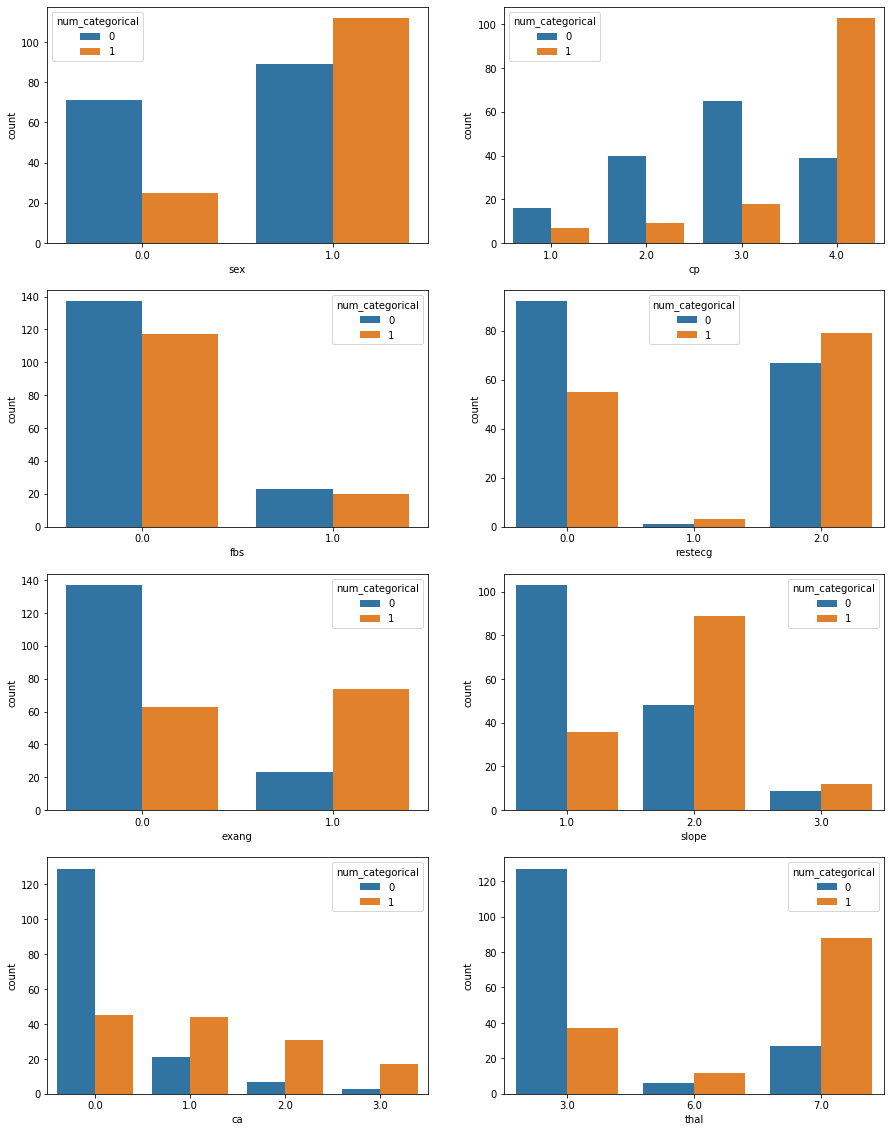

In [32]:
fig, ax = plt.subplots(4, 2, figsize=(15, 20))
for var, subplot in zip(cat, ax.flatten()):
    sns.countplot(data=data, x=var, hue='num_categorical', ax=subplot)

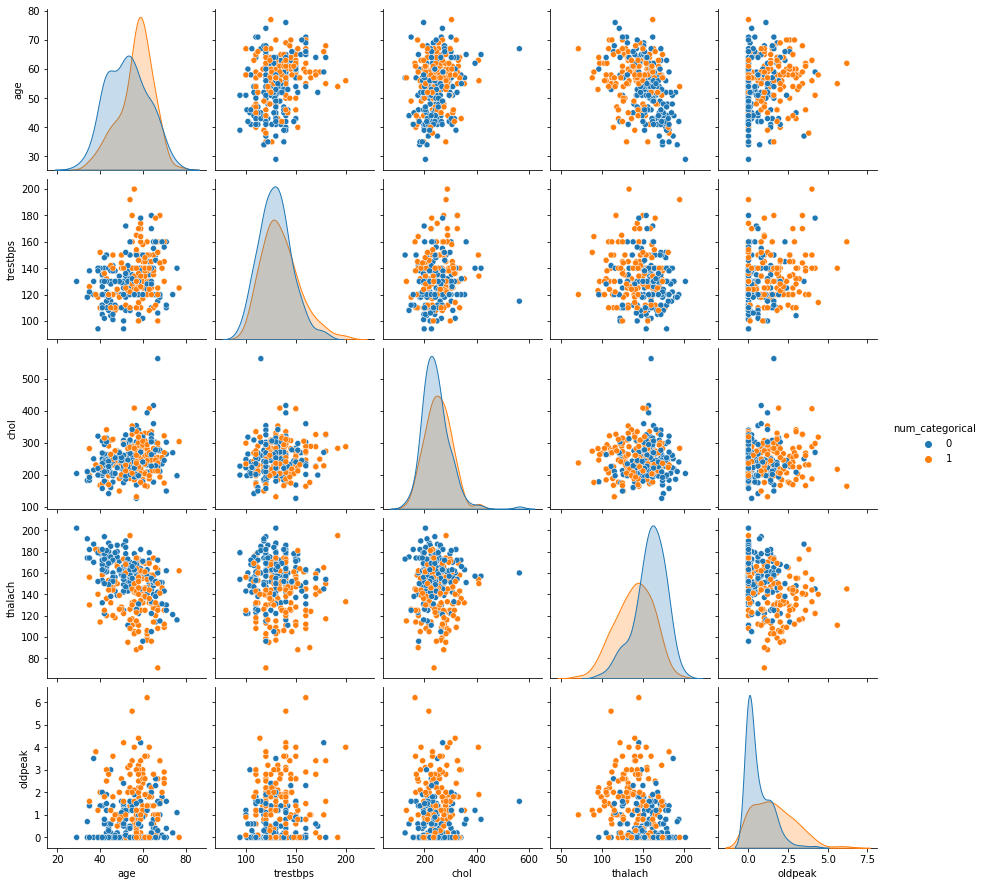

In [33]:
sns.pairplot(data=data[cont], hue='num_categorical')

# Model

## Base Model - SVM

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop(['num_categorical'], axis = 1)
y = data['num_categorical']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape, X_test.shape

((237, 14), (60, 14))

In [36]:
y_train.shape, y_test.shape

((237,), (60,))

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SVC(kernel='rbf',gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [38]:
y_pred = clf.predict(X_test)

In [39]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.96      0.98        24

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [41]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,36,0
1,1,23


# Deep Learning - NN

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [48]:
X = data.drop(['num_categorical','num'], axis = 1)
y = data['num_categorical']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = preprocessing.StandardScaler()

In [50]:
numerical = ['age','trestbps','chol','thalach','oldpeak']

X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [51]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
277,-1.741679,0.0,3.0,0.319284,-0.544213,0.0,0.0,0.151798,0.0,-0.915041,2.0,0.0,3.0
262,0.601114,0.0,1.0,0.985981,-0.161771,0.0,0.0,0.971399,0.0,-0.121634,1.0,0.0,3.0
30,1.605169,0.0,1.0,0.430400,-0.180893,0.0,0.0,0.108661,0.0,0.671774,1.0,2.0,3.0
22,0.377991,1.0,2.0,-0.680763,0.679601,0.0,2.0,0.496893,0.0,0.671774,2.0,0.0,3.0
281,-0.849186,1.0,3.0,-0.125182,0.086816,0.0,0.0,1.316494,0.0,-0.915041,1.0,0.0,3.0


# Epoch 125

In [52]:
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    
    # define model
    model = Sequential()
    model.add(Dense(15, input_shape=(13,), activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=125, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()

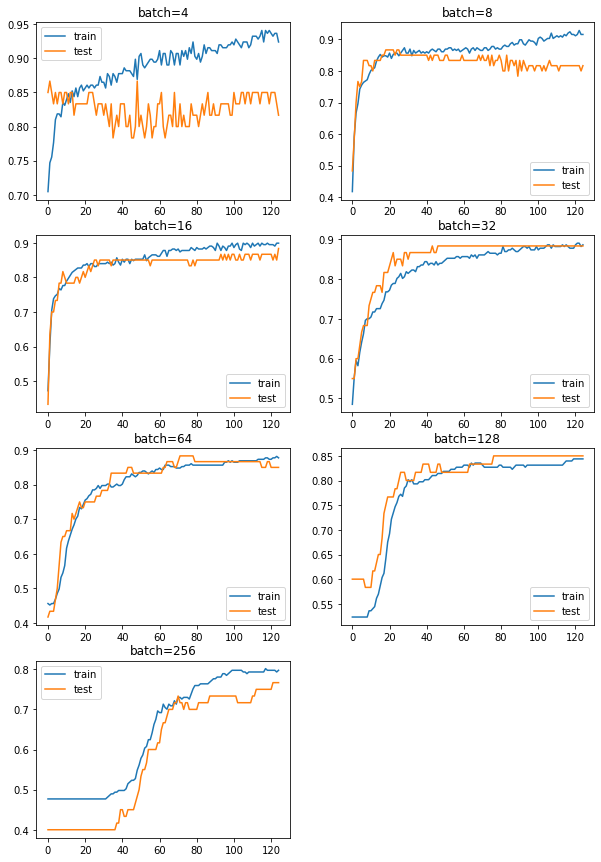

In [54]:
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256]

plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])

# show learning curves
plt.show()

# Epoch 250

In [55]:
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    
    # define model
    model = Sequential()
    model.add(Dense(15, input_shape=(13,), activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()

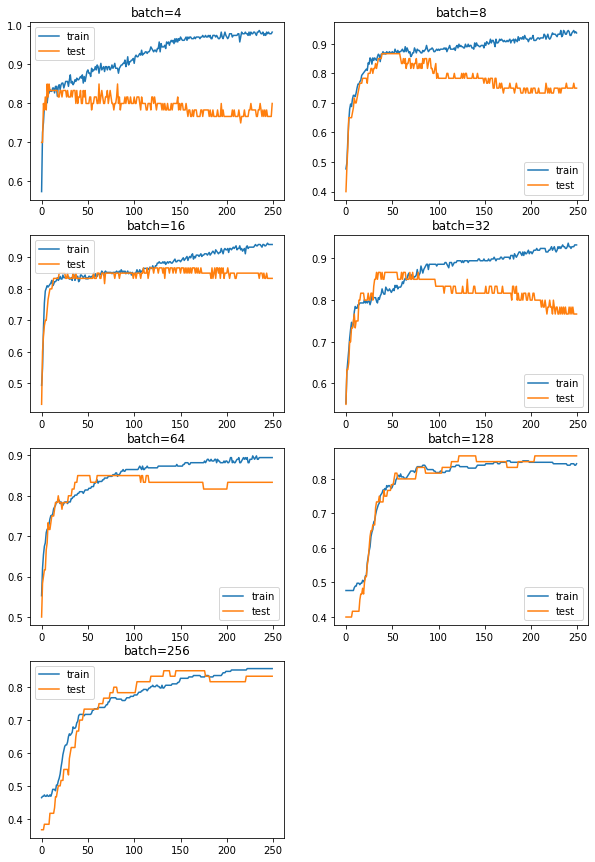

In [57]:
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256]

plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])

# show learning curves
plt.show()

# Insight

- Epoch 125 seems work better for batch size 32 and 64
- Epoch 125 leads to overfitting for batch size 4, 16, 32 and to underfitting for batch size 128 and 256
- Epoch 250 works better for batch size 128, but it shows to start overfitting after epoch 200
- Epoch 125 leads to overfitting for batch size 4, 16, 32, 64 and not convergence yet for 256
- We might need to implement early stopping criteria before overfitting

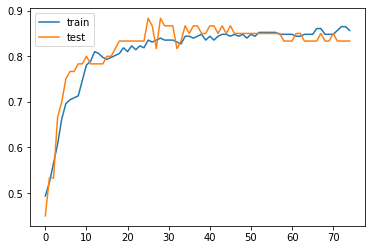

In [112]:
# Define Model

model = Sequential()
model.add(Dense(15, input_shape=(13,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75, verbose=0, batch_size=32)
    
# Plot learning curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [114]:
y_pred = model.predict_classes(X_test)

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        36
           1       0.77      0.83      0.80        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



In [116]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,30,6
1,4,20


# Conclusion

- The current NN model has not strong enough to improve the F1-score accuracy compare to base model using SVM without any hyperparameter tuning

---